In [29]:
#imports
import pickle
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [30]:
#get data
ratings_fin_sector_data= pickle.load(open("ratings_fin_sector_master.p","rb"))
ratings_fin_sector_data.head()


,ticker,Name,company,financial year end (month),industry code,indicator,Q1-2009,Q2-2009,Q3-2009,Q4-2009,...,sector-_Consumer Staples,sector-_Energy,sector-_Financials,sector-_Health Care,sector-_Industrials,sector-_Information Technology,sector-_Materials,sector-_Real Estate,sector-_Telecommunication Services,sector-_Utilities
0,MMM,3M Company,3M,12,100001,EBIT,803.0,1191.0,1478.0,1342.0,...,0,0,0,0,1,0,0,0,0,0
1,MMM,3M Company,3M,12,100001,EBITDA,1074.0,1489.0,1768.0,1640.0,...,0,0,0,0,1,0,0,0,0,0
2,MMM,3M Company,3M,12,100001,Net Profit,518.0,783.0,957.0,935.0,...,0,0,0,0,1,0,0,0,0,0
3,MMM,3M Company,3M,12,100001,Dividends,-354.0,-355.0,-361.0,-361.0,...,0,0,0,0,1,0,0,0,0,0
4,AOS,A.O. Smith Corp,Smith A O Corp,12,100001,EBIT,16.0,33.0,46.0,6.0,...,0,0,0,0,1,0,0,0,0,0


In [33]:
# select only profits
#Create a reduced data frame to visualize pair-plots for profits
ratings_fin_data_sector_profits = ratings_fin_sector_data[ratings_fin_sector_data["indicator"] =="Net Profit"]
ratings_fin_data_sector_profits = ratings_fin_data_sector_profits.drop_duplicates().reset_index()

ratings_fin_data_sector_profits.tail()

# pickle because this is can be re-used:
pickle.dump(ratings_fin_data_sector_profits,
            open("ratings_fin_sector_PROFITS_ONLY.p","wb"))



In [23]:
# Run Stats model, just for explanatory value and Betas

# format data for stats model  (No train test split)

# may need to reformat this, if there is weird stuff with strings and formatting
y, X = patsy.dmatrices("""Q("company_ratings") ~ 
                       Q("Q4-2016") 
                       + Q("sector-_Consumer Staples")
                       + Q("sector-_Energy")  
                       + Q("sector-_Financials")
                       + Q("sector-_Health Care") 
                       + Q("sector-_Industrials")
                       + Q("sector-_Information Technology") 
                       + Q("sector-_Materials")
                       + Q("sector-_Real Estate") 
                       + Q("sector-_Telecommunication Services") 
                       + Q("sector-_Utilities")
                       """, data= ratings_fin_data_sector_profits,
                       return_type="dataframe")

# note, the Q and quotes notation is to get the model to read the variable names properly
                         
    
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()



# Template below
# https://github.com/thisismetis/chi18_ds7/blob/master/class_lectures/week02-luther1/03-regression_statsmodels/Intro_to_Regression_STARTER.ipynb
# Create your feature matrix (X) and target vector (y)
#y, X = patsy.dmatrices('Y ~ X1 + X2 + X3 + X4 + X5 + X6', data=df, return_type="dataframe")
                         # string of Names of columns from the dataframes






<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Q("company_ratings")   R-squared:                       0.106
Model:                              OLS   Adj. R-squared:                  0.082
Method:                   Least Squares   F-statistic:                     4.335
Date:                  Fri, 20 Jul 2018   Prob (F-statistic):           3.87e-06
Time:                          03:34:21   Log-Likelihood:                -7.7530
No. Observations:                   413   AIC:                             39.51
Df Residuals:                       401   BIC:                             87.79
Df Model:                            11                                         
Covariance Type:              nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   3.8153      0.032    119.162      0.000       3.752       3.878
Q("Q4-2016")                             3.298e-05   1.07e-05      3.082      0.002    1.19e-05     5.4e-05
Q("sector-_Consumer Staples")               0.0318      0.058      0.546      0.585      -0.083       0.146
Q("sector-_Energy")                         0.1958      0.057      3.423      0.001       0.083       0.308
Q("sector-_Financials")                    -0.0518      0.046     -1.116      0.265      -0.143       0.039
Q("sector-_Health Care")                   -0.0256      0.047     -0.541      0.589      -0.119       0.067
Q("sector-_Industrials")                   -0.0669      0.046     -1.443      0.150      -0.158       0.024
Q("sector-_Information Technology")         0.1090      0.045      2.426      0.016       0.021       0.197
Q("sector-_Materials")                     -0.0014      0.063     -0.022      0.983      -0.126       0.123
Q("sector-_Real Estate")                    0.0414      0.060      0.687      0.492      -0.077       0.160
Q("sector-_Telecommunication Services")    -0.1587      0.149     -1.062      0.289      -0.452       0.135
Q("sector-_Utilities")                      0.1072      0.061      1.748      0.081      -0.013       0.228
==============================================================================
Omnibus:                       18.993   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.243
Skew:                          -0.471   Prob(JB):                     2.44e-05
Kurtosis:                       3.588   Cond. No.                     1.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

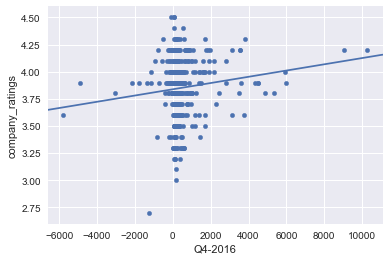

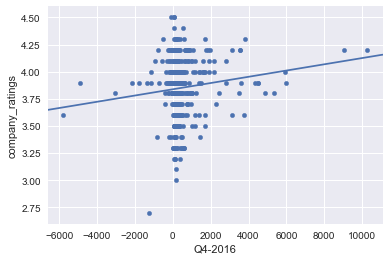

In [27]:
# Cell for quick plotting
# https://stackoverflow.com/questions/42261976/how-to-plot-statsmodels-linear-regression-ols-cleanly
from statsmodels.graphics.regressionplots import abline_plot

# Simplified model for quick plot:
y, X = patsy.dmatrices("""Q("company_ratings") ~ Q("Q4-2016") """, 
                       data= ratings_fin_data_sector_profits,
                       return_type="dataframe")

# note, the Q and quotes notation is to get the model to read the variable names properly
                         
    
simp_model = sm.OLS(y,X)
simp_fit = simp_model.fit()
simp_fit.summary()

# regress "ratings" onto "profitabity" (plus an intercept)

# scatter-plot data
axes = ratings_fin_data_sector_profits.plot(x='Q4-2016', y='company_ratings', kind='scatter')

# plot regression line

abline_plot(model_results=simp_model.fit(), ax=axes)

In [28]:
simp_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Q("company_ratings")   R-squared:                       0.018
Model:                              OLS   Adj. R-squared:                  0.015
Method:                   Least Squares   F-statistic:                     7.440
Date:                  Fri, 20 Jul 2018   Prob (F-statistic):            0.00665
Time:                          04:38:29   Log-Likelihood:                -27.252
No. Observations:                   413   AIC:                             58.50
Df Residuals:                       411   BIC:                             66.55
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.8377      0.014    280.979      0.000       3.811       3.865
Q("Q4-2016")  2.876e-05   1.05e-05      2.728      0.007    8.03e-06    4.95e-05
==============================================================================
Omnibus:                       21.523   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.710
Skew:                          -0.503   Prob(JB):                     4.31e-06
Kurtosis:                       3.652   Cond. No.                     1.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Run Lasso, does this eliminate anything?

    # First, train test split

        # Format Data appropriately
        
    # Hold out for total test

    # Validation, stratify?
    
# Actual Test